# Analyze spatial ATAC–RNA-seq on Mouse Brain Using MultiGATE

This tutorial demonstrates the application of the MultiGATE framework to analyze Spatial ATAC–RNA-seq data of the mouse brain. The raw data, processing file and processed data are available at [Google Drive](https://drive.google.com/drive/folders/1Z1-6uhM0BcAxBJC9_bUTg5xkBfXCVctP?usp=sharing).

In [4]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os


import MultiGATE 

import warnings
warnings.filterwarnings('ignore')




## Preparation

### Load RNA data

In [5]:

base_path = './p22output'
file_name = "../data_tutorial/p22/P22_RNA.h5ad"
adata1 = sc.read_h5ad(file_name)
adata1.obsm["spatial"] = adata1.obsm["spatial"][:, [1, 0]] * -1  
adata1


AnnData object with n_obs × n_vars = 9215 × 16252
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'

------Calculating spatial graph...
The graph contains 72606 edges, 9215 cells.
7.8791 neighbors per cell on average.


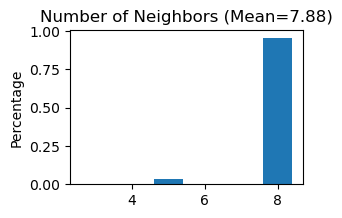

In [6]:

MultiGATE.Cal_Spatial_Net(adata1, rad_cutoff=40)
MultiGATE.Stats_Spatial_Net(adata1)


### Load ATAC data

In [7]:


file_name = "../data_tutorial/p22/P22_ATAC_lsi.h5ad"
adata2 = sc.read_h5ad(file_name)
adata2.obsm["spatial"] = adata2.obsm["spatial"][:, [1, 0]] * -1  
adata2


AnnData object with n_obs × n_vars = 9215 × 120400
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'

In [ ]:

MultiGATE.Cal_Spatial_Net(adata2, rad_cutoff=40)
MultiGATE.Stats_Spatial_Net(adata2)

adata1 = adata1[:, adata1.var['highly_variable']]
adata2 = adata2[:, adata2.var['highly_variable']]

MultiGATE.Cal_gene_peak_Net_new(adata1, adata2, 150000)
adata1.uns['gene_peak_Net'] = adata2.uns['gene_peak_Net']



## Running MultiGATE

In [ ]:

num_epochs = 3000
adata1, adata2 = MultiGATE.train_MultiGATE(adata1, adata2, bp_width=400, alpha=0, temp=-10.0, n_epochs=num_epochs)


## Clustering

In [5]:
# the location of R (used for the WNN clustering)
os.environ['R_HOME'] = "/lustre/project/Stat/s1155077016/condaenvs/Seurat4/lib/R" 
os.environ['R_USER'] = '/users/s1155077016/anaconda3/lib/python3.9/site-packages/rpy2'

In [7]:
size=20
MultiGATE.wnn_R(adata1, adata2, res=2.0)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Attaching SeuratObject

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Calculating cell-specific modality weights

R[write to console]: Finding 20 nearest neighbors for each modality.



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~02s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=04s  


R[write to console]: Calculating kernel bandwidths



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


R[write to console]: Finding multimodal neighbors



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~07s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=14s  
  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  


R[write to console]: Constructing multimodal KNN graph

R[write to console]: Constructing multimodal SNN graph

R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 12:54:40 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 12:54:40 Commencing smooth kNN distance calibration using 1 thread

R[write to console]: 12:54:41 Initializing from normalized Laplacian + noise

R[write to console]: 12:54:41 Commencing optimization for 500 epochs, with 274836 positive edges

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[wri

(AnnData object with n_obs × n_vars = 9215 × 3000
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mclust', 'louvain', 'rna', 'wnn'
     var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
     uns: 'Spatial_Net', 'avg', 'gene_peak_Net', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'mclust_colors', 'neighbors', 'rna_colors', 'umap', 'wnn_colors'
     obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'
     obsp: 'avg_connectivities', 'avg_distances', 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 9215 × 50000
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_c

## Visualize the results

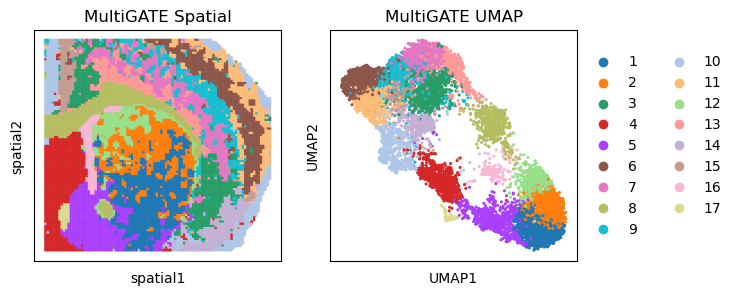

<Figure size 700x300 with 0 Axes>

In [9]:


plt.rcParams["figure.figsize"] = (7, 3)
fig, axs = plt.subplots(1, 2)
sc.pl.embedding(adata1, basis="spatial", color="wnn", s=20, show=False, title='MultiGATE Spatial', ax=axs[0], legend_loc='None')
sc.pl.umap(adata1, color="wnn", title='MultiGATE UMAP', ax=axs[1], size=20)
plt.tight_layout()
plt.show()